<a href="https://colab.research.google.com/github/josephcabezas/Flight-Fare-Prediction/blob/main/FlightFarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#!pip install matplotlib.pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os


In [3]:
from google.colab import files
uploaded = files.upload()

Saving business.csv to business.csv
Saving Clean_Dataset.csv to Clean_Dataset.csv
Saving economy.csv to economy.csv


In [4]:
df = pd.read_csv("Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [10]:
df=df.drop('Unnamed: 0', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [21]:
df.corr().T

ValueError: could not convert string to float: 'SpiceJet'

In [14]:
df.shape

(300153, 11)

In [15]:
df1 = df.groupby(['flight', 'airline'], as_index=False).count()
df1.airline.value_counts()

,count
airline,
Indigo,704
Air_India,218
GO_FIRST,205
SpiceJet,186
Vistara,133
AirAsia,115


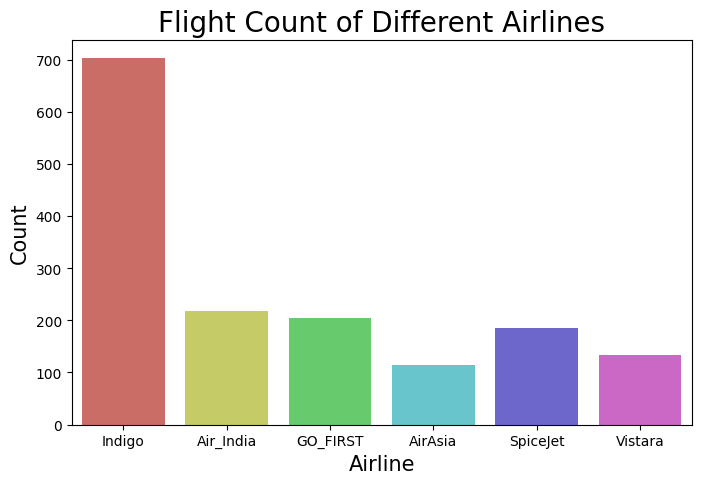

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x=df1['airline'], palette='hls')
plt.title('Flight Count of Different Airlines', fontsize=20)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [24]:
df2=df.groupby(['flight','airline','class'], as_index=False).count()
df2['class'].value_counts()

,count
class,
Economy,1560
Business,295


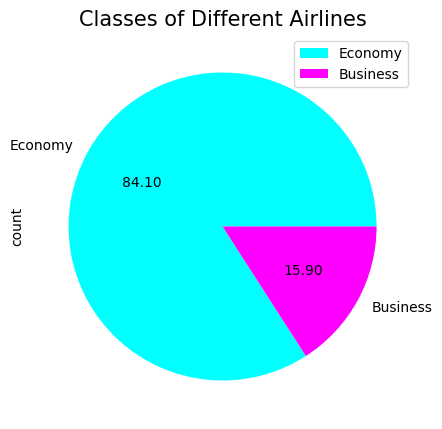

In [25]:
plt.figure(figsize=(8,5))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines', fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

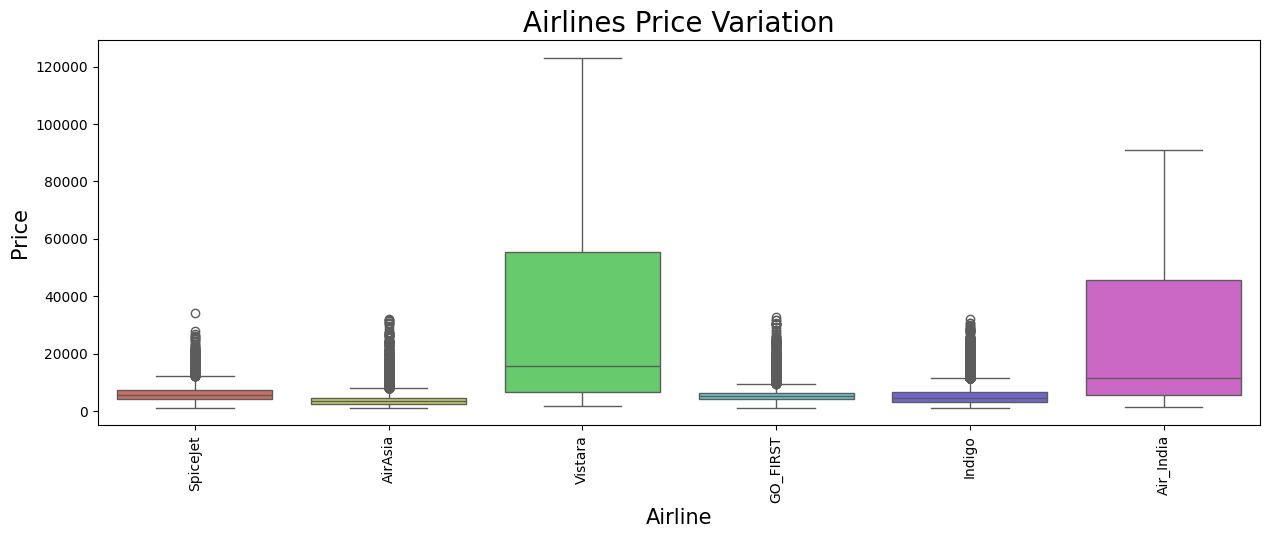

In [27]:
# check if prices vary by airline
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'], palette='hls')
plt.title('Airlines Price Variation', fontsize=20)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation=90)
plt.show

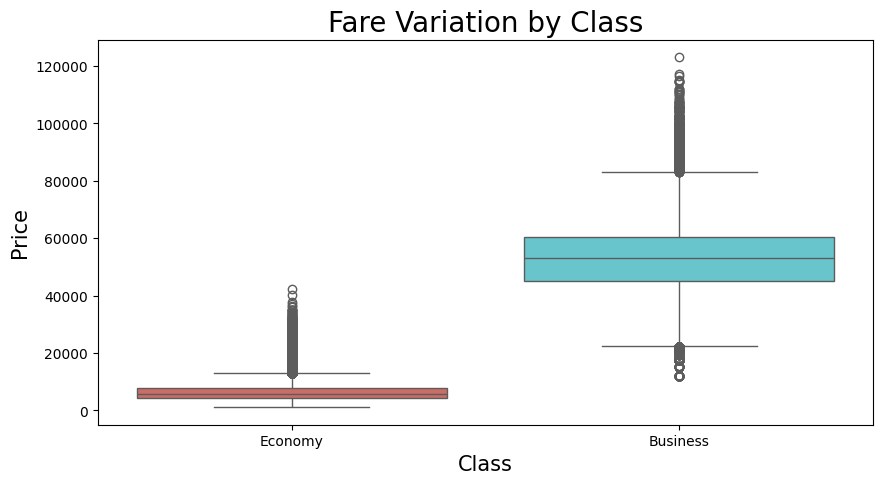

In [28]:
# check variation fare and flight class
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Fare Variation by Class', fontsize=20)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

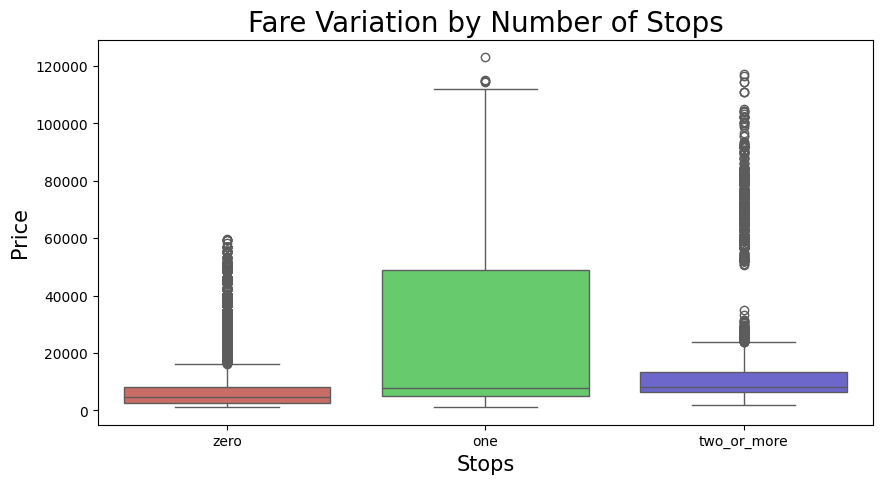

In [29]:
# fare variation by number of stops
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Fare Variation by Number of Stops', fontsize=20)
plt.xlabel('Stops', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

You can do the same boxplot process with other variables (departure time, arrival time, source city, destination city, etc)

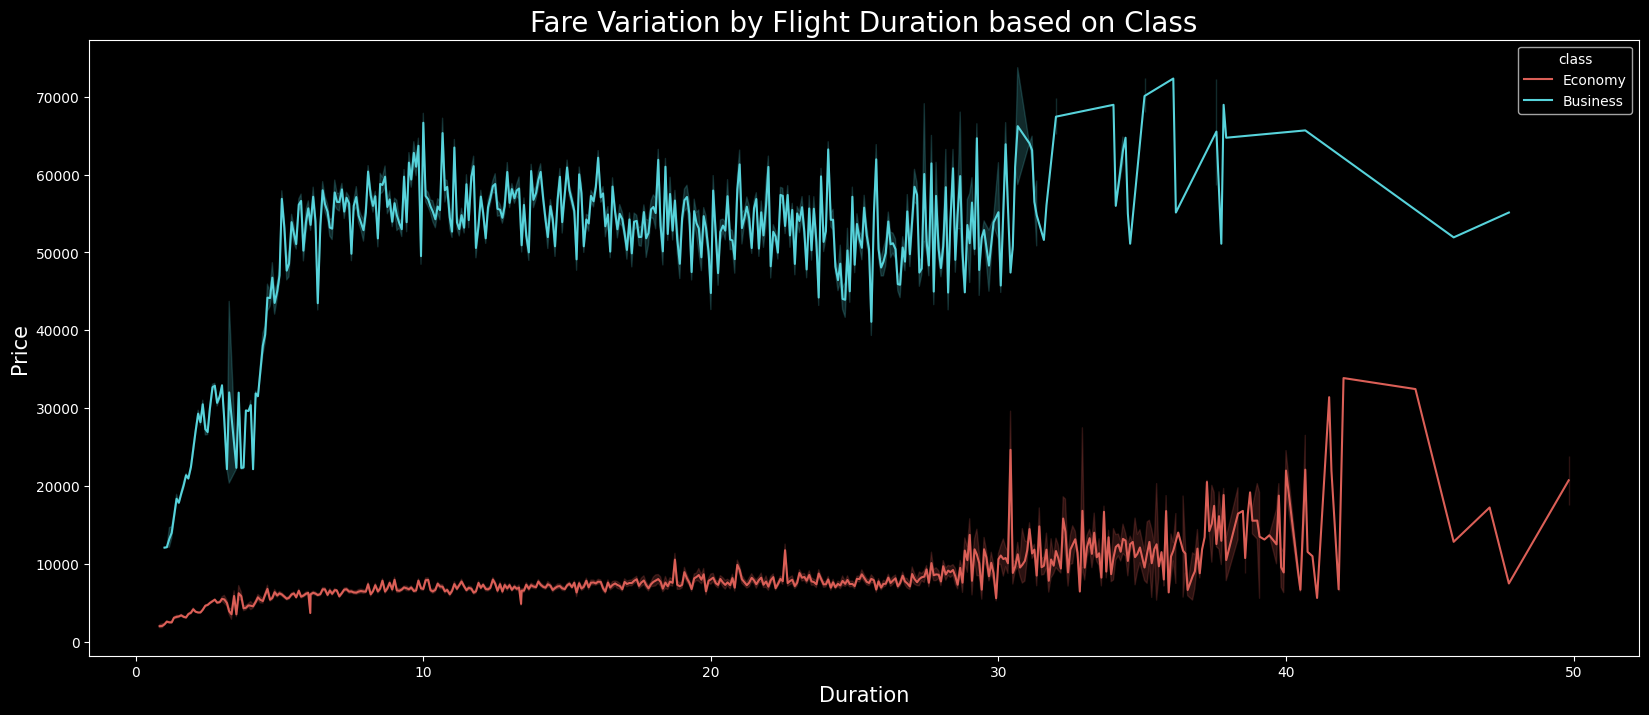

In [31]:
# how does fare vary with flight duration based on class?
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Fare Variation by Flight Duration based on Class', fontsize=20)
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

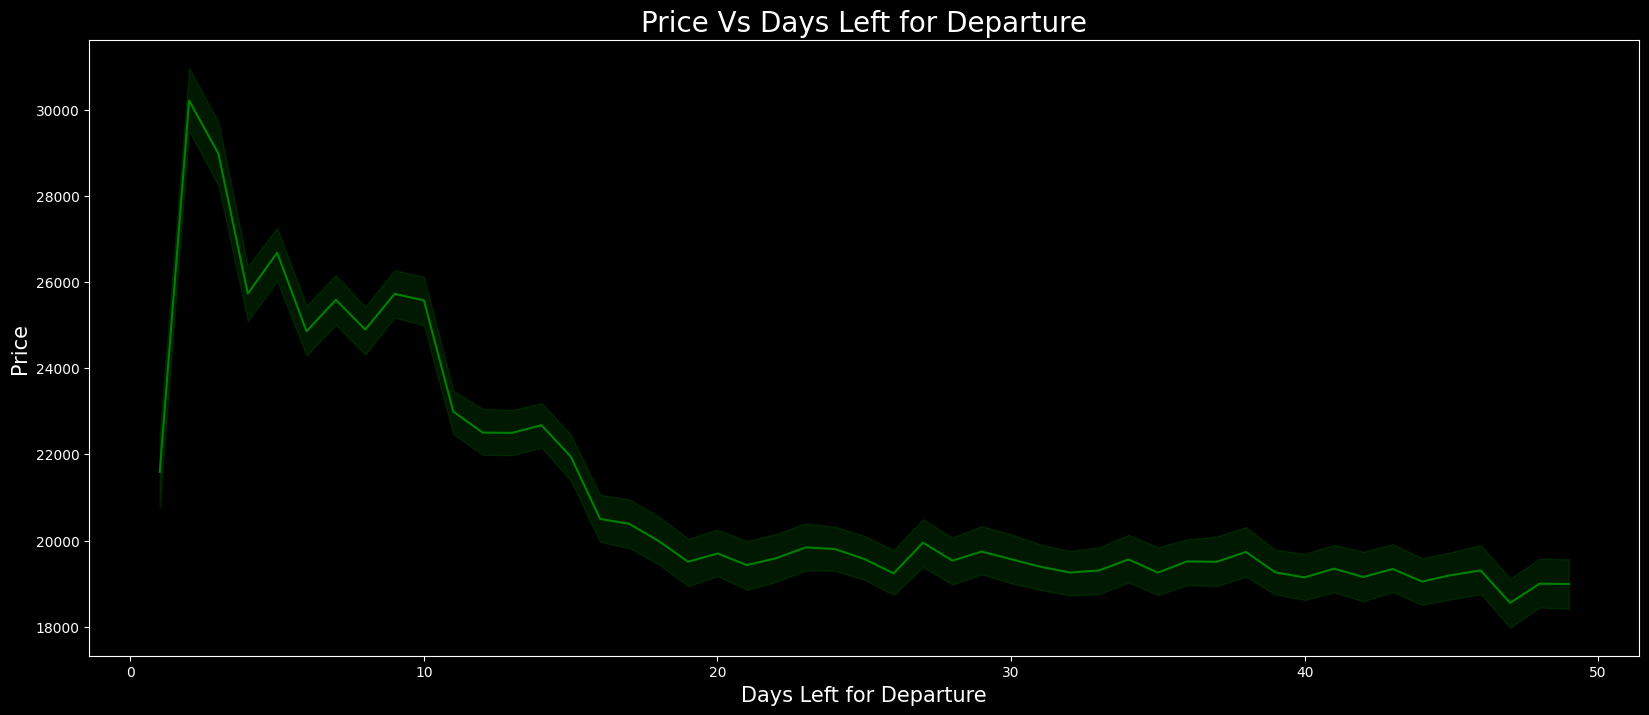

In [32]:
# how is price affected by days left for departure
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='green')
plt.title('Price Vs Days Left for Departure', fontsize=20)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

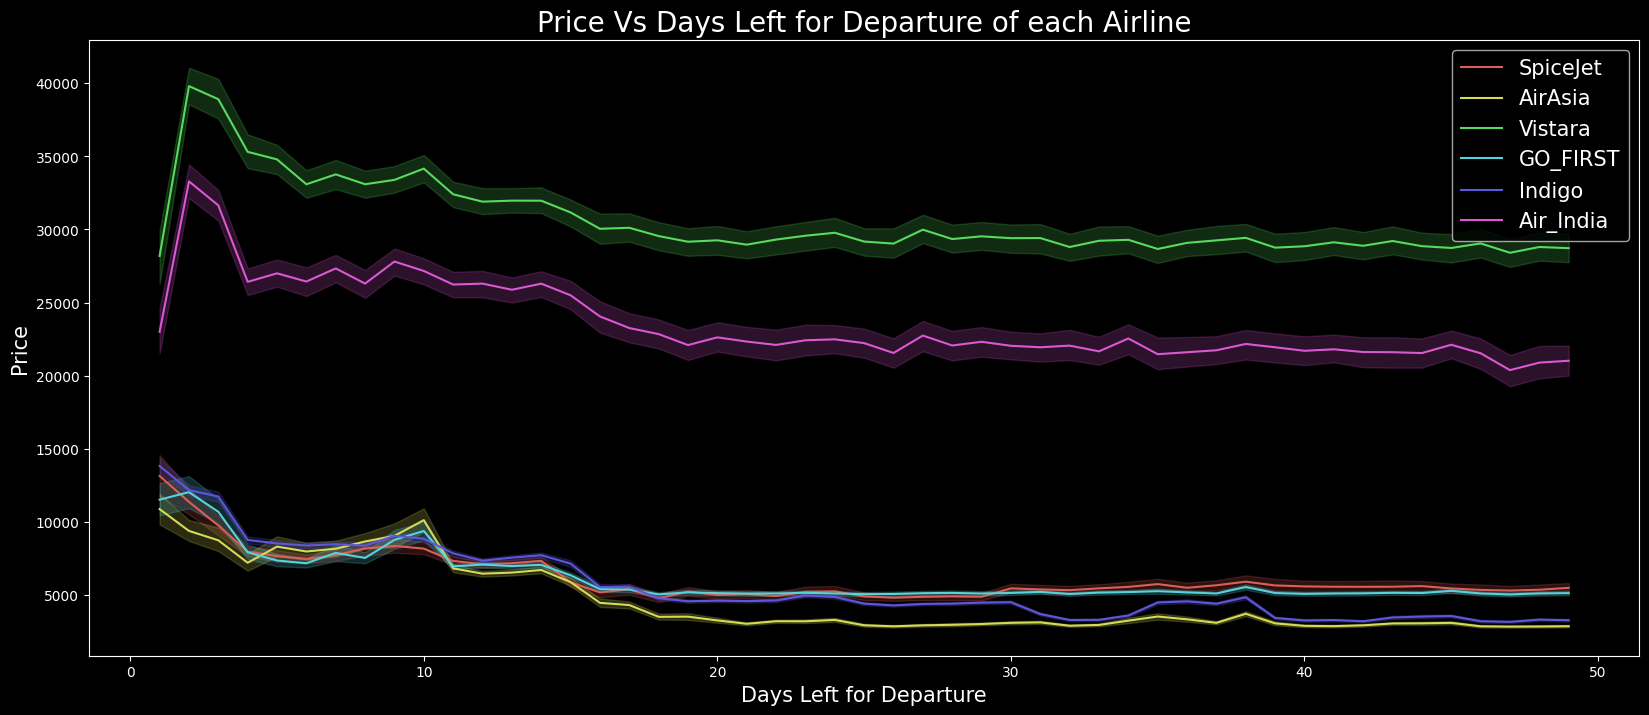

In [33]:
# price vs days left for departure by airline
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price', color='blue', hue='airline',palette='hls')
plt.title('Price Vs Days Left for Departure of each Airline', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [40]:
#total num of flights from one city to another
df_grouped = df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False) \
           .count() \
           .groupby(['source_city','destination_city'],as_index=False)['flight'] \
           .count() \
           .head(20)

# sort by num of flights
df_sorted=df_grouped.sort_values(by='flight',ascending=False)
df_sorted.head(20)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
11,Delhi,Chennai,258
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
4,Bangalore,Mumbai,175
3,Bangalore,Kolkata,171
18,Hyderabad,Kolkata,145
2,Bangalore,Hyderabad,132


In [41]:
# make a back up file
df_bk=df.copy()

In [44]:
# convert labels into a numeric form; label encoder = le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [43]:
# store dependent var in X and independent var in y\
x=df.drop(['price'],axis=1)
y=df['price']

In [45]:
# split data into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [46]:
# scale value to convert integers to machine languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [47]:
a = {'Model Name':[], 'Mean_Absolute_Error_MAE':[], 'Adj_R_Square': [], \
     'Root_Mean_Squared_Error_RMSE:':[], 'Mean_Absolute_Percentage_Error_MAPE':[], \
     'Mean_Squared_Error_MSE':[], 'Root_Mean_Squared_Log_Error_RMSLE':[], \
     'R2_score': []}

Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE:,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [55]:
# build the regressor models for doing regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#create objects with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, \
                                     n_estimators=100, subsample=1.0, \
                                     criterion='friedman_mse', \
                                     min_samples_split=2, min_samples_leaf=1, \
                                     min_weight_fraction_leaf=0.0, max_depth=3, \
                                     min_impurity_decrease=0.0, init=None, \
                                     random_state=None, max_features=None, \
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, \
                                     warm_start=False, validation_fraction=0.1, \
                                     n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# evaluation matrix for algos

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:

  #fit the model with training data
  models.fit(x_train, y_train)

  #predict the model with testing data
  y_pred = models.predict(x_test)

  #print the model name
  print ('Model Name: ', models)

  # evaluation metrics for regression analysis
  from sklearn import metrics
  print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
  print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
  print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
  print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
  print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

  def MAPE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  #evaluation of MAPE

  result = MAPE(y_test, y_pred)
  print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

  # calculate Adjusted R squared values
  r_squared = round(metrics.r2_score(y_test, y_pred),6)
  adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
  print('Adj R Square: ', adjusted_r_squared)
  print('---------------------------------------------------------------')

  new_row = {'Model Name':models, 'Mean_Absolute_Error_MAE':metrics.mean_absolute_error(y_test, y_pred), \
             'Adj_R_Square': adjusted_r_squared, 'Root_Mean_Squared_Error_RMSE:':np.sqrt(metrics.mean_squared_error(y_test, y_pred)), \
             'Mean_Absolute_Percentage_Error_MAPE':result, 'Mean_Squared_Error_MSE':metrics.mean_squared_error(y_test, y_pred), \
             'Root_Mean_Squared_Log_Error_RMSLE':np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 'R2_score':metrics.r2_score(y_test, y_pred)}

  Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)


Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
---------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1263.354
Mean Squared Error (MSE): 13763479.645
Root Mean Squared Error (RMSE): 3709.916
R2_score: 0.973257
Root Mean Squared Log Error (RMSLE): 8.219
Mean Absolute Percentage Error (MAPE): 8.61 %
Adj R Square:  0.973256
---------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1171.61
Mean Squared Error (MSE): 8181804.497
Root Mean Squared Error (RMSE): 2860.385
R2_score: 0.984103
Root Mean Squared Log Error (RMSLE): 7.959
Mean Absolute Percentage Error (MAPE): 7.92 %
Adj R Square:  0.984102
-----------------------

In [56]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE:,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1270.561972,0.973152,3717.178343,8.675713,1.381741e+07,8.220720,0.973153
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1168.372627,0.984116,2859.090120,7.905499,8.174396e+06,7.958259,0.984117
3,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
4,"(ExtraTreeRegressor(random_state=982675121), E...",1144.671242,0.984683,2807.621833,7.622552,7.882740e+06,7.940093,0.984684
5,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
6,DecisionTreeRegressor(),1263.353714,0.973256,3709.916393,8.608986,1.376348e+07,8.218765,0.973257
7,"(DecisionTreeRegressor(max_features=1.0, rando...",1171.609859,0.984102,2860.385376,7.921491,8.181804e+06,7.958712,0.984103
8,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
9,"(ExtraTreeRegressor(random_state=1469543149), ...",1145.473678,0.984774,2799.266167,7.649325,7.835891e+06,7.937113,0.984775


In [57]:
Results=Results.iloc[5:]

Results = Results.reset_index(drop=True)
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE:,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1263.353714,0.973256,3709.916393,8.608986,1.376348e+07,8.218765,0.973257
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1171.609859,0.984102,2860.385376,7.921491,8.181804e+06,7.958712,0.984103
3,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
4,"(ExtraTreeRegressor(random_state=1469543149), ...",1145.473678,0.984774,2799.266167,7.649325,7.835891e+06,7.937113,0.984775
5,([DecisionTreeRegressor(criterion='friedman_ms...,2808.069729,0.956823,4713.929945,20.673000,2.222114e+07,8.458277,0.956824
6,"XGBRegressor(base_score=None, booster=None, ca...",1862.407118,0.977303,3417.712919,14.232981,1.168076e+07,8.136727,0.977304
7,(DecisionTreeRegressor(random_state=2130781024...,1205.267786,0.982977,2959.807222,8.271900,8.760459e+06,7.992879,0.982978
8,Ridge(),4630.313301,0.904653,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
9,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [59]:
# sorting the models by comparing Errors, Adj_R_Square and R2_Score values

models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE:'] # lol i typoed earlier with an extra colon
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984774,1145.473678,2799.266167,7.649325,7.835891e+06,7.937113,0.984775
1,RandomForestRegressor,0.984102,1171.609859,2860.385376,7.921491,8.181804e+06,7.958712,0.984103
2,BaggingRegressor,0.982977,1205.267786,2959.807222,8.271900,8.760459e+06,7.992879,0.982978
3,XGBRegressor,0.977303,1862.407118,3417.712919,14.232981,1.168076e+07,8.136727,0.977304
4,DecisionTreeRegressor,0.973256,1263.353714,3709.916393,8.608986,1.376348e+07,8.218765,0.973257
5,KNeighborsRegressor,0.971657,1853.746812,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
6,GradientBoostingRegressor,0.956823,2808.069729,4713.929945,20.673000,2.222114e+07,8.458277,0.956824
7,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
8,Ridge Regression,0.904653,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
9,Lasso Regression,0.904653,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [60]:
# the best model was the ExtraTreesRegressor

modelETR.fit(x_train, y_train)

# predict the model with test data

y_pred = modelETR.predict(x_test)

In [61]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result = df_bk.merge(out,left_index=True,right_index=True)

In [62]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
177744,Vistara,UK-874,Hyderabad,Morning,one,Morning,Chennai,Economy,24.33,19,6287,6287,6184.02
152967,Indigo,6E-6277,Hyderabad,Afternoon,one,Evening,Delhi,Economy,5.25,6,12328,12328,12980.54
30757,Air_India,AI-560,Delhi,Morning,zero,Morning,Hyderabad,Economy,2.33,18,2098,2098,2861.20
71250,Air_India,AI-867,Mumbai,Night,one,Morning,Hyderabad,Economy,13.00,9,7584,7584,7627.04
43301,Air_India,AI-637,Mumbai,Evening,one,Night,Delhi,Economy,26.42,3,10826,10826,11539.37
24528,GO_FIRST,G8-7535,Delhi,Evening,one,Night,Kolkata,Economy,6.58,26,5954,5954,6012.18
118345,Vistara,UK-812,Bangalore,Morning,one,Night,Chennai,Economy,13.00,34,6825,6825,6439.46
27806,Air_India,AI-636,Delhi,Afternoon,one,Afternoon,Kolkata,Economy,21.67,44,4933,4933,5058.97
160129,Air_India,AI-543,Hyderabad,Morning,one,Morning,Mumbai,Economy,21.75,14,7774,7774,7774.00
169613,Vistara,UK-874,Hyderabad,Morning,one,Early_Morning,Bangalore,Economy,23.33,40,5441,5441,5441.00


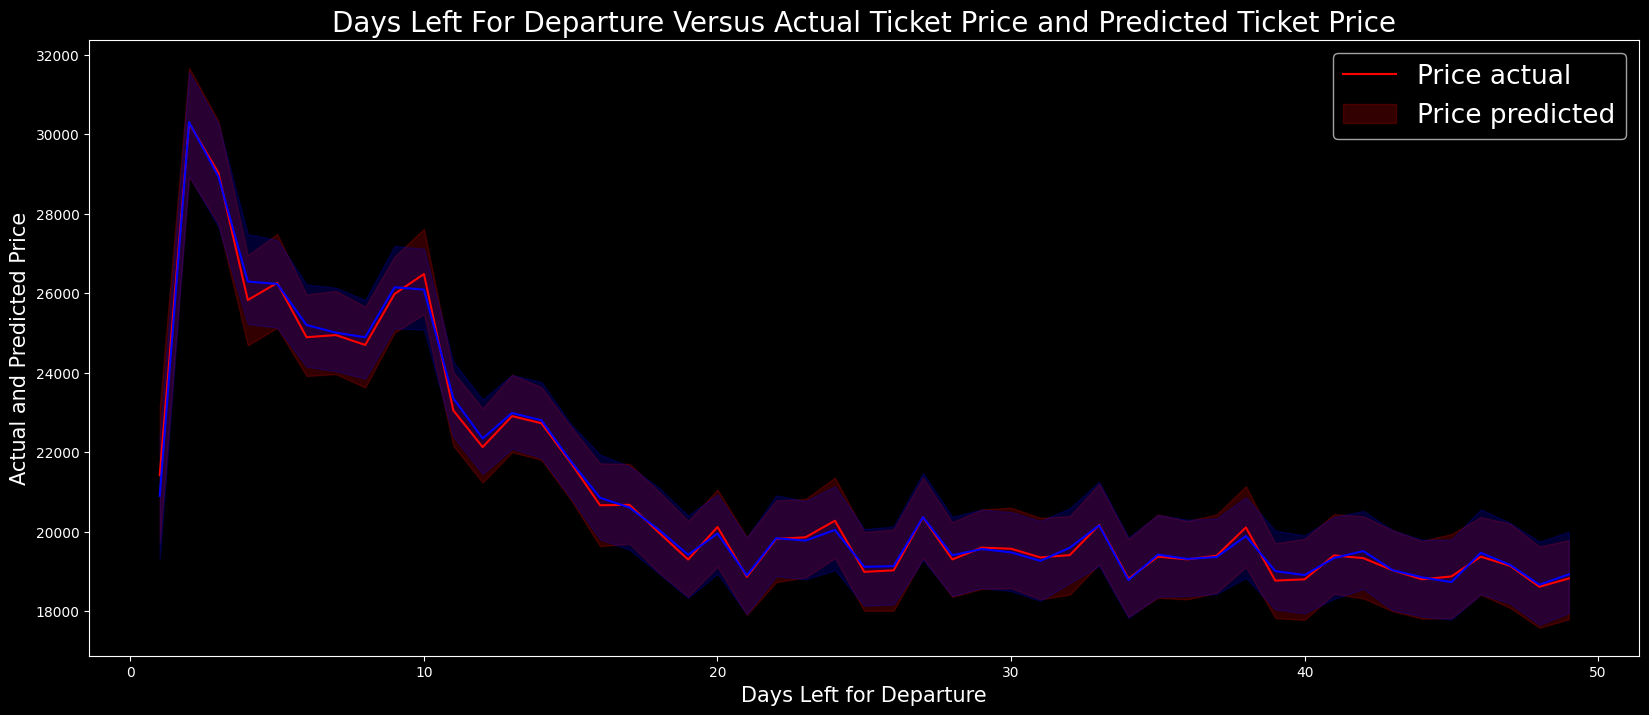

In [63]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

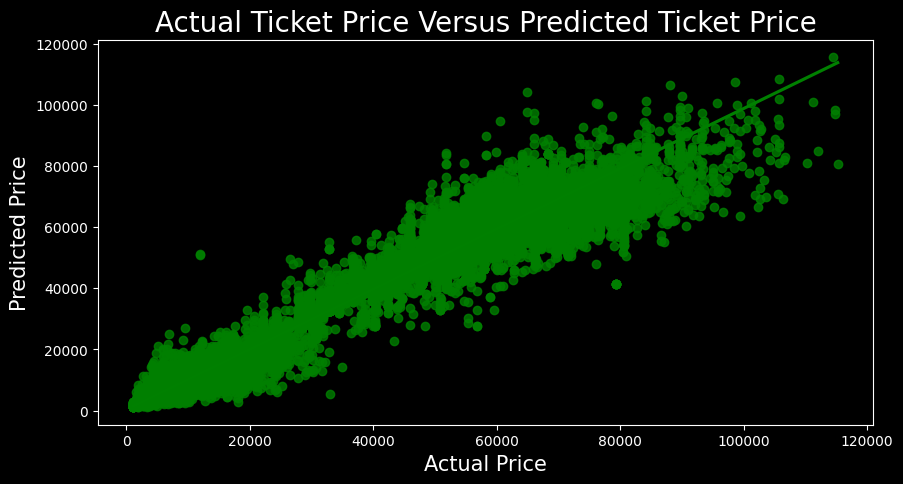

In [64]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='green')
plt.title('Actual Ticket Price Versus Predicted Ticket Price',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()